In [1]:
%matplotlib inline
from package import OmdbApi, SeriesPlot
from package.github import omdb_api_key, timetools
import requests
from functools import partial 
from pprint import pprint
pprint = partial(pprint, width = 250)
import math

api = OmdbApi(omdb_api_key)
response = api.get('tt4016454', True)
pprint(response)

{'actors': 'Melissa Benoist, Mehcad Brooks, Chyler Leigh, Jeremy Jordan',
 'awards': '4 wins & 9 nominations.',
 'country': 'USA',
 'director': 'N/A',
 'duration': Duration('PT43M'),
 'genre': 'Action, Adventure, Drama',
 'imdbId': 'tt4016454',
 'imdbRating': 6.5,
 'imdbVotes': 75279,
 'language': 'English',
 'metaScore': nan,
 'plot': "The adventures of Superman's cousin in her own superhero career.",
 'rating': 'TV-PG',
 'ratings': [{'Source': 'Internet Movie Database', 'Value': '6.5/10'}],
 'releaseDate': Timestamp('2015-10-26'),
 'responseStatus': True,
 'seasons': [{'episodes': [{'id': 'S01E01', 'imdbId': 'tt4525842', 'imdbRating': 7.2, 'indexInSeason': 1, 'indexInSeries': 1, 'releaseDate': Timestamp('2015-10-26'), 'title': 'Pilot'},
                           {'id': 'S01E02', 'imdbId': 'tt4550416', 'imdbRating': 7.4, 'indexInSeason': 2, 'indexInSeries': 2, 'releaseDate': Timestamp('2015-11-02'), 'title': 'Stronger Together'},
                           {'id': 'S01E03', 'imdbId': 

Total Episodes:  50


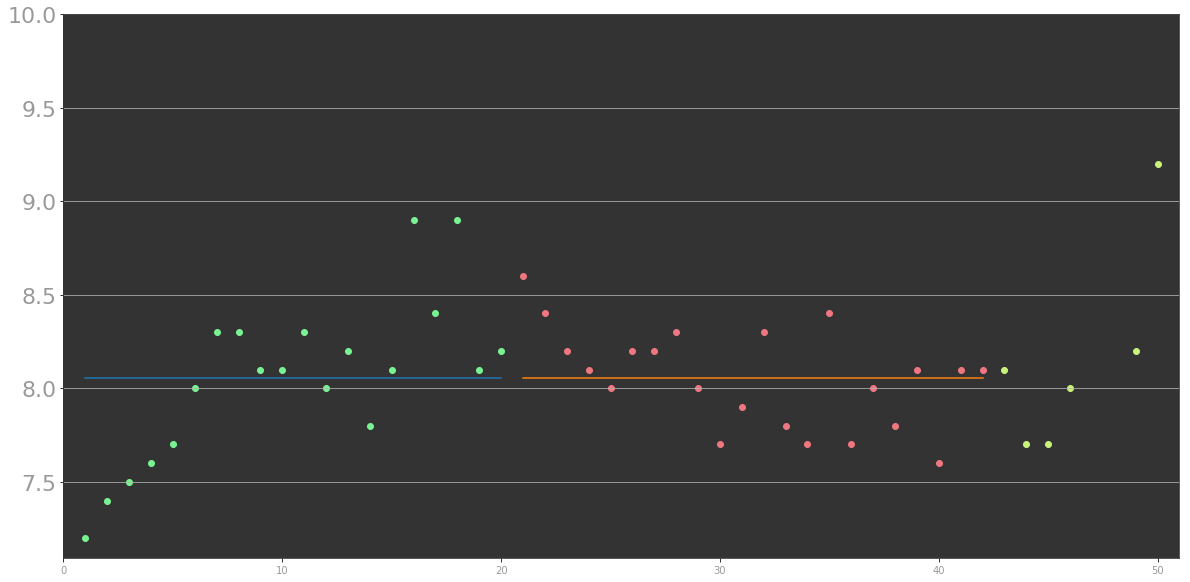

In [2]:
graph = SeriesPlot(response)